# Images as Data

[![Open in Colab](https://img.shields.io/static/v1?logo=google-colab&message=Open%20in%20colab&color=blue&label=%20&labelColor=5c5c5c)](https://colab.research.google.com/github/vanvalenlab/bebi205/blob/master/bebi205/notebooks/images.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

## File Formats

### Open source file formats

[imageio](https://imageio.github.io/) is an incredibly useful library that can read and write most standard image formats including `tiff`, `jpg` and `png`. Check the docs for a complete list of supported [formats](https://imageio.readthedocs.io/en/stable/formats.html). We will start by loading two key functions: `imread` and `imwrite`.

In [3]:
from imageio import imread,imwrite

`imread` can load files stored locally or through a web address. Here we will load a sample image from the dataset collection from the course.

In [4]:
im = imread('https://storage.googleapis.com/datasets-spring2021/HeLa_nuclear.png')

The data returned by the `imread` function is a numpy array, so we can start learning about the data by checking the shape of the array.

In [8]:
im.shape

(1080, 1280)

In order to viusalize the data, we will turn to matplotlib's `imshow` function. This function can also be called using `ax.imshow` in order to plot an image as a subplot.

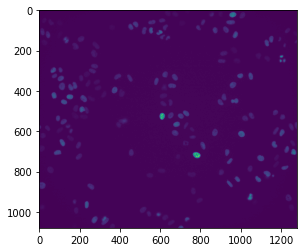

In [6]:
plt.imshow(im)

This function supports a variety of [keyword arguments](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) that include changing the colormap used to display the image and changing the minimum and maximum values that scale the colormap. Matplotlib will generally default to using the `viridis` colormap, but we can choose from a range of [options](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html) supported by matplotlib. As an example, we will switch to using the `inferno` colormap and look at the effect of changing the minimum and maximum scaling values.

In [12]:
np.max(im),np.min(im)

(10195, 76)

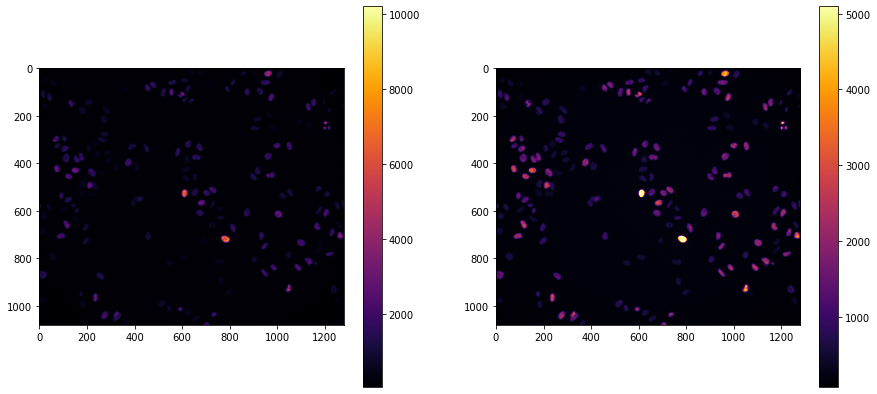

In [20]:
# Setup two subplots to compare the impact of changing vmin and vmax
fig,ax = plt.subplots(1,2,figsize=(15,7))

# Store the output of imshow in order to set up a colorbar for that suplot
cb0 = ax[0].imshow(im, cmap='inferno')
fig.colorbar(cb0, ax=ax[0])

cb1 = ax[1].imshow(im, cmap='inferno', vmin=np.min(im), vmax=np.max(im)/2)
fig.colorbar(cb1, ax=ax[1])

### Proprietary File Formats
Most microscopes store data using proprietary file formats designed by the manufacturer of the microscope, such as `lif` (Leica), `nd2` (Nikon) and `czi` (Zeiss).

The [Open Microscopy Environment](https://www.openmicroscopy.org/) (OME) is a consortium spanning academia and industry that produces open source software and format standards for microscopy data. They develop [Bioformats](https://www.openmicroscopy.org/bio-formats/) which is a critical library for reading and writing the vast majority of biological image data types. You may have encountered the Bioformats plugin for [Fiji](https://fiji.sc/) which enables to Fiji to open practically any file you throw at it. Python support for Bioformats is limited, but CellProfiler has published a [python wrapper](https://github.com/CellProfiler/python-bioformats) for the core Java library underlying Bioformats.

### Large dataset formats
Ultimately large image datasets are generally stored in one of two ways:

1) As a directory of individual fields of view (FOV) in a generally accessible format such as `tiff`. Information regarding the channel, z position or t step captured in each file is typically encoded in the file name such that high dimensional datasets can be reconstructed from individual files.

2) As a multidimensional hyperstack containing the entire dataset within a single file. There are many choices for this type of file format, but numpy's file format `npz` is a common choice. `h5` files by [HDF5](https://www.hdfgroup.org/solutions/hdf5/) are also favored for the flexibility of data organization within each file.

## Image Transformations

In the course of training a machine learning model, we can augment the training dataset by performing image transformations to present the model with the same data in a new form. These transformations can take the form of reflections, rotations, scaling and others. In its simplest form, any transformation can be applied to an image by multiplying it with an appropriate transformation matrix. We will briefly review the linear algebra behind transformation matrices before looking at code examples.

For this discussion, we will consider the point $P(x,y) = \begin{bmatrix}x&y\end{bmatrix}$. Any transformation matrix is a modification of the identity matrix 
$$
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}
$$

For each code example, we will apply the transformation to a 1x1 square whose bottom left corner is the origin.

In [20]:
points = np.array([[0,0],[1,1],[0,1],[1,0]])

### Reflection

In order to reflect $P(x,y)$ across the x axis

$$
\begin{bmatrix}x & y\end{bmatrix} \times
\begin{bmatrix}
    -1 & 0\\
    0 & 1\\
\end{bmatrix}
=
\begin{bmatrix}-x & y\end{bmatrix}
$$

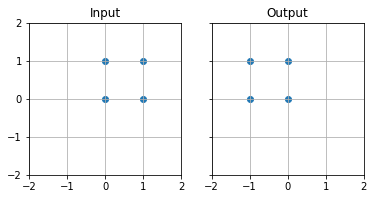

In [55]:
# Define transformation matrix
M = np.array([
    [-1,0],
    [0,1]
])

# Use matrix multiplication @ to multiply points by the transformation matrix
rot = points @ M

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)

for i,(d,t) in enumerate(zip([points,rot],['Input','Output'])):
    ax[i].scatter(d[:,0],d[:,1])
    ax[i].set_title(t)
    
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)

### Scale

In order to scale $P(x,y)$ by a factor of 2

$$
\begin{bmatrix}x & y\end{bmatrix} \times
\begin{bmatrix}
    2 & 0\\
    0 & 2\\
\end{bmatrix}
=
\begin{bmatrix}2x & 2y\end{bmatrix}
$$

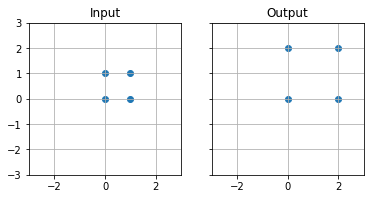

In [57]:
# Define transformation matrix
M = np.array([
    [2,0],
    [0,2]
])

# Use matrix multiplication @ to multiply points by the transformation matrix
rot = points @ M

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)

for i,(d,t) in enumerate(zip([points,rot],['Input','Output'])):
    ax[i].scatter(d[:,0],d[:,1])
    ax[i].set_title(t)
    
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_xlim(-3,3)
    ax[i].set_ylim(-3,3)

### Rotation

In order to rotate $P(x,y)$ around the origin by the angle $\theta$

$$
\begin{bmatrix}x & y\end{bmatrix} \times
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta}\\
    \sin{\theta} & \cos{\theta}\\
\end{bmatrix}
$$

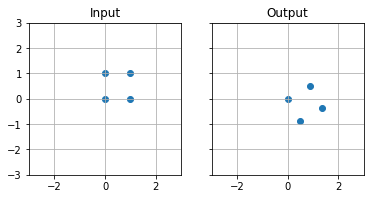

In [58]:
# Define transformation matrix
theta = np.pi/3
M = np.array([
    [np.cos(theta),-np.sin(theta)],
    [np.sin(theta),np.cos(theta)]
])

# Use matrix multiplication @ to multiply points by the transformation matrix
rot = points @ M

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)

for i,(d,t) in enumerate(zip([points,rot],['Input','Output'])):
    ax[i].scatter(d[:,0],d[:,1])
    ax[i].set_title(t)
    
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_xlim(-3,3)
    ax[i].set_ylim(-3,3)

We will revisit transformation matrices again when we begin peparing augmented data for model training.